In [1]:
import pandas as pd
#Specify the file name
file_name="cleaned_covid-19 INDIA.csv"
#Load CSV file
df=pd.read_csv(file_name)
print(df.head())
print(df.tail())
#Get the shape
print(df.shape)
#Describe the numerical columns
print(df.describe())
#Display column headers with data types
print(df.columns)
print(df.dtypes)
df.to_csv("cleaned_covid-19 INDIA.csv",index=False)

   Sno State/UnionTerritory  ConfirmedIndianNational  \
0    1               Kerala                      1.0   
1    2               Kerala                      1.0   
2    3               Kerala                      2.0   
3    4               Kerala                      3.0   
4    5               Kerala                      3.0   

   ConfirmedForeignNational  Cured  Deaths  Confirmed             DateTime  
0                       0.0      0       0          1  2020-01-30 18:00:00  
1                       0.0      0       0          1  2020-01-31 18:00:00  
2                       0.0      0       0          2  2020-02-01 18:00:00  
3                       0.0      0       0          3  2020-02-02 18:00:00  
4                       0.0      0       0          3  2020-02-03 18:00:00  
     Sno State/UnionTerritory  ConfirmedIndianNational  \
441  442           Tamil Nadu                     34.0   
442  443            Telengana                     46.0   
443  444          Uttarakha

In [3]:
pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('cleaned_covid-19 INDIA.csv')

# Display the first few rows of the dataframe
print(data.head())

   Sno State/UnionTerritory  ConfirmedIndianNational  \
0    1               Kerala                      1.0   
1    2               Kerala                      1.0   
2    3               Kerala                      2.0   
3    4               Kerala                      3.0   
4    5               Kerala                      3.0   

   ConfirmedForeignNational  Cured  Deaths  Confirmed             DateTime  
0                       0.0      0       0          1  2020-01-30 18:00:00  
1                       0.0      0       0          1  2020-01-31 18:00:00  
2                       0.0      0       0          2  2020-02-01 18:00:00  
3                       0.0      0       0          3  2020-02-02 18:00:00  
4                       0.0      0       0          3  2020-02-03 18:00:00  


In [7]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values (if necessary)
data = data.dropna()

Sno                         0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
DateTime                    0
dtype: int64


In [9]:
# Convert 'DateTime' to datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'])

# Group by state or union territory and calculate total confirmed, cured, and deaths
summary = data.groupby('State/UnionTerritory').agg({
    'ConfirmedIndianNational': 'sum',
    'Cured': 'sum',
    'Deaths': 'sum',
    'Confirmed': 'sum'
}).reset_index()

print(summary)

           State/UnionTerritory  ConfirmedIndianNational  Cured  Deaths  \
0   Andaman and Nicobar Islands                      8.0      0       0   
1                Andhra Pradesh                     81.0      4       0   
2                         Bihar                     32.0      0       7   
3                    Chandigarh                     50.0      0       0   
4                  Chhattisgarh                     25.0      0       0   
5                         Delhi                    352.0     62      15   
6                           Goa                      9.0      0       0   
7                       Gujarat                    256.0      0      13   
8                       Haryana                    111.0     56       0   
9              Himachal Pradesh                     21.0      0       5   
10            Jammu and Kashmir                     95.0      4       2   
11                    Karnataka                    405.0     21      19   
12                       

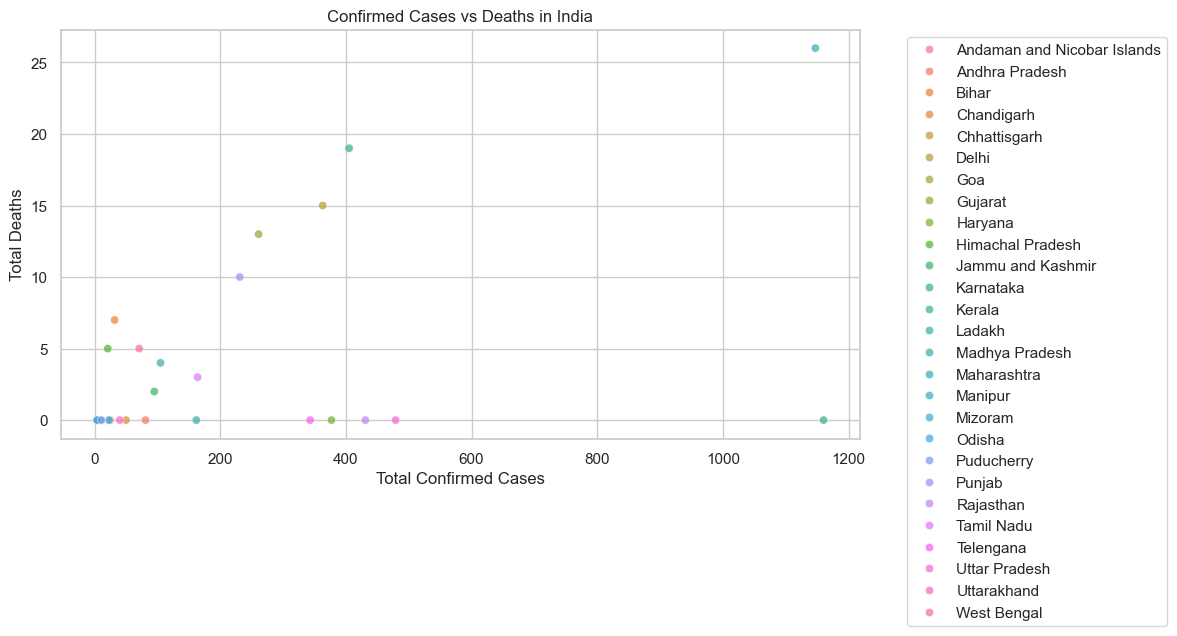

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style='whitegrid')

# Scatter plot of confirmed cases vs deaths
plt.figure(figsize=(12, 6))
sns.scatterplot(data=summary, x='Confirmed', y='Deaths', hue='State/UnionTerritory', alpha=0.7)
plt.title('Confirmed Cases vs Deaths in India')
plt.xlabel('Total Confirmed Cases')
plt.ylabel('Total Deaths')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()

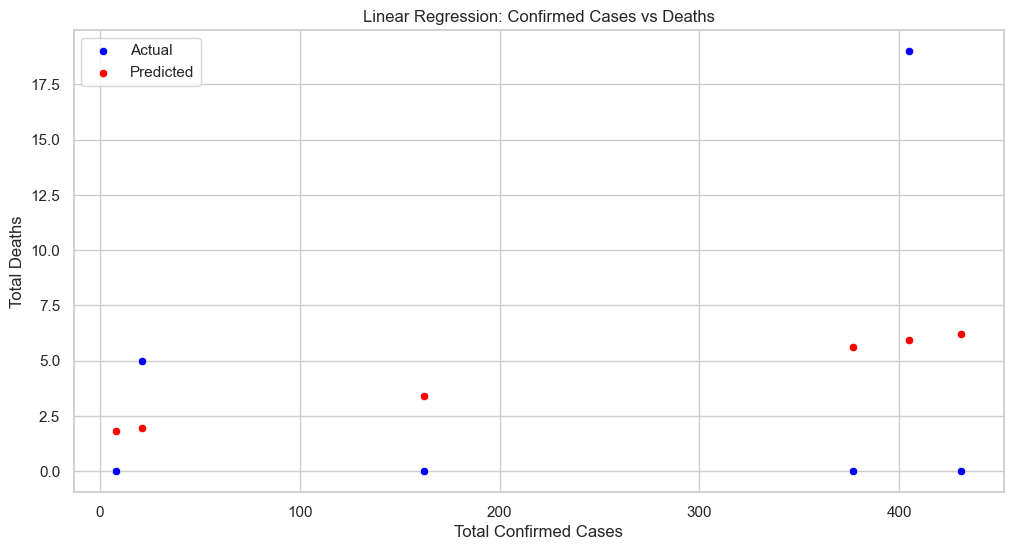

Mean Squared Error: 44.21413806210183
Mean Absolute Error: 5.5300654073834785
R² Score: 0.08522472974961726


In [13]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 2: Load the Data
data = pd.read_csv('cleaned_covid-19 INDIA.csv')
data['DateTime'] = pd.to_datetime(data['DateTime'])
data = data.dropna()

# Step 3: Prepare the Data for Linear Regression
summary = data.groupby('State/UnionTerritory').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum'
}).reset_index()

X = summary[['Confirmed']]
y = summary['Deaths']

# Step 4: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Visualize the Results
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_test['Confirmed'], y=y_test, label='Actual', color='blue')
sns.scatterplot(x=X_test['Confirmed'], y=y_pred, label='Predicted', color='red')
plt.title('Linear Regression: Confirmed Cases vs Deaths')
plt.xlabel('Total Confirmed Cases')
plt.ylabel('Total Deaths')
plt.legend()
plt.show()

# Step 8: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

<Figure size 800x600 with 0 Axes>

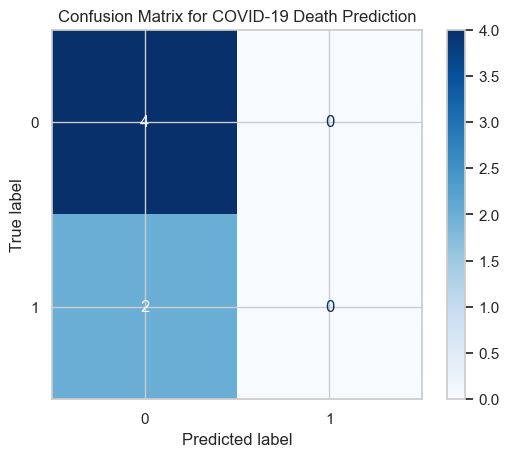

Confusion Matrix:
 [[4 0]
 [2 0]]


In [19]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 2: Load the Data
data = pd.read_csv('cleaned_covid-19 INDIA.csv')
data['DateTime'] = pd.to_datetime(data['DateTime'])
data = data.dropna()

# Step 3: Prepare the Data for Classification
summary = data.groupby('State/UnionTerritory').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum'
}).reset_index()

# Creating a binary target variable: 1 if deaths > 0, else 0
summary['Death_Binary'] = (summary['Deaths'] > 0).astype(int)

# Features and target variable
X = summary[['Confirmed']]
y = summary['Death_Binary']

# Step 4: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Step 8: Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for COVID-19 Death Prediction')
plt.show()

# Step 9: Print the Confusion Matrix Values
print("Confusion Matrix:\n", cm)

Accuracy: 0.67


<Figure size 800x600 with 0 Axes>

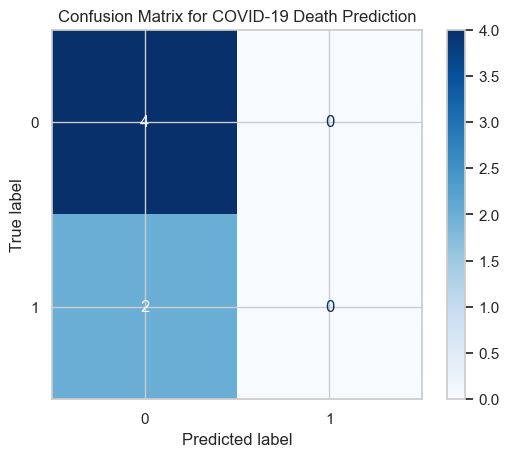

Confusion Matrix:
 [[4 0]
 [2 0]]


In [21]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Step 2: Load the Data
data = pd.read_csv('cleaned_covid-19 INDIA.csv')
data['DateTime'] = pd.to_datetime(data['DateTime'])
data = data.dropna()

# Step 3: Prepare the Data for Logistic Regression
summary = data.groupby('State/UnionTerritory').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum'
}).reset_index()

# Creating a binary target variable: 1 if deaths > 0, else 0
summary['Death_Binary'] = (summary['Deaths'] > 0).astype(int)

# Features and target variable
X = summary[['Confirmed']]
y = summary['Death_Binary']

# Step 4: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Step 8: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Step 9: Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for COVID-19 Death Prediction')
plt.show()

# Step 10: Print the Confusion Matrix Values
print("Confusion Matrix:\n", cm)

C:\Users\l\anaconda3\python\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:23:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.50


<Figure size 800x600 with 0 Axes>

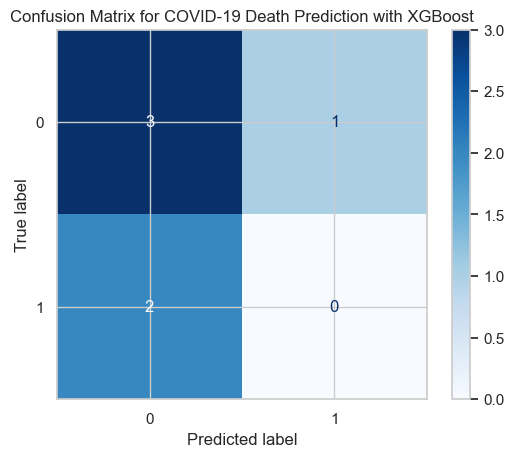

Confusion Matrix:
 [[3 1]
 [2 0]]


In [23]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import xgboost as xgb

# Step 2: Load the Data
data = pd.read_csv('cleaned_covid-19 INDIA.csv')
data['DateTime'] = pd.to_datetime(data['DateTime'])
data = data.dropna()

# Step 3: Prepare the Data for XGBoost
summary = data.groupby('State/UnionTerritory').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum'
}).reset_index()

# Creating a binary target variable: 1 if deaths > 0, else 0
summary['Death_Binary'] = (summary['Deaths'] > 0).astype(int)

# Features and target variable
X = summary[['Confirmed']]
y = summary['Death_Binary']

# Step 4: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the XGBoost Model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Step 8: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Step 9: Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for COVID-19 Death Prediction with XGBoost')
plt.show()

# Step 10: Print the Confusion Matrix Values
print("Confusion Matrix:\n", cm)

C:\Users\l\anaconda3\python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\l\anaconda3\python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\l\anaconda3\python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\l\anaconda3\python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory le

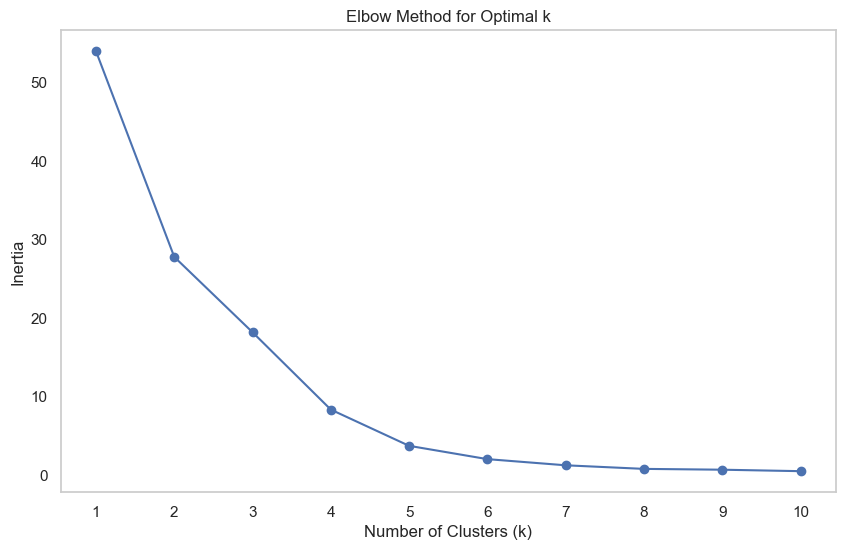

C:\Users\l\anaconda3\python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


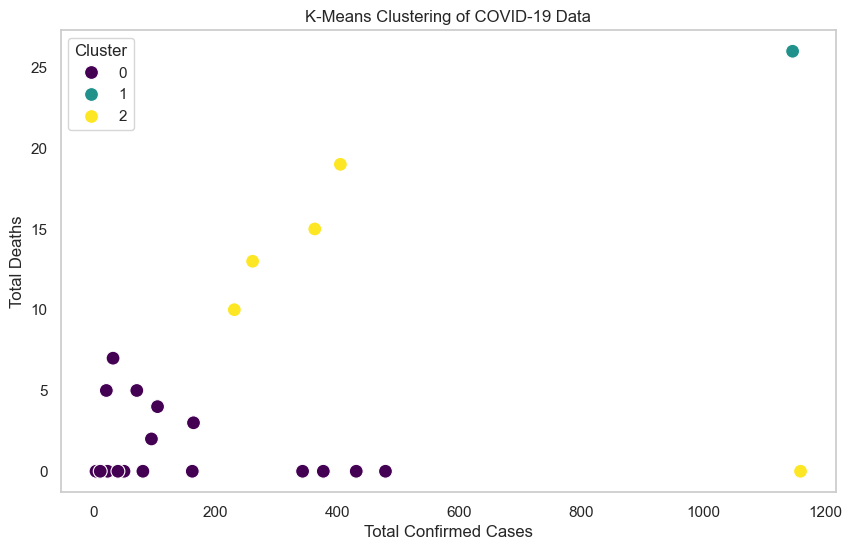

In [25]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 2: Load the Data
data = pd.read_csv('cleaned_covid-19 INDIA.csv')
data['DateTime'] = pd.to_datetime(data['DateTime'])
data = data.dropna()

# Step 3: Prepare the Data for Clustering
summary = data.groupby('State/UnionTerritory').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum'
}).reset_index()

# Step 4: Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(summary[['Confirmed', 'Deaths']])

# Step 5: Determine the Optimal Number of Clusters using Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(K)
plt.grid()
plt.show()

# Step 6: Fit K-Means with Optimal k
optimal_k = 3  # Set this based on the Elbow method analysis
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
summary['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 7: Visualize the Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=summary, x='Confirmed', y='Deaths', hue='Cluster', palette='viridis', s=100)
plt.title('K-Means Clustering of COVID-19 Data')
plt.xlabel('Total Confirmed Cases')
plt.ylabel('Total Deaths')
plt.legend(title='Cluster')
plt.grid()
plt.show()

Accuracy: 0.33


<Figure size 800x600 with 0 Axes>

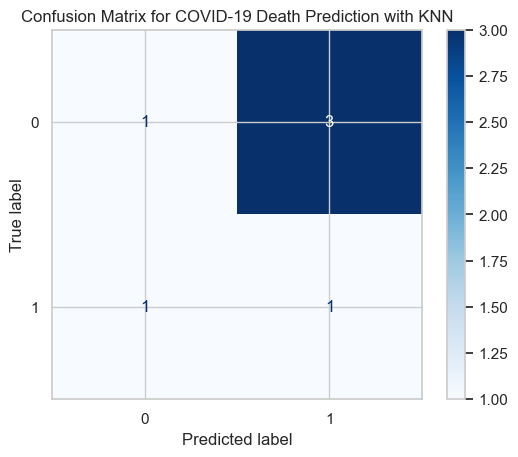

Confusion Matrix:
 [[1 3]
 [1 1]]


In [27]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Step 2: Load the Data
data = pd.read_csv('cleaned_covid-19 INDIA.csv')
data['DateTime'] = pd.to_datetime(data['DateTime'])
data = data.dropna()

# Step 3: Prepare the Data for KNN
summary = data.groupby('State/UnionTerritory').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum'
}).reset_index()

# Creating a binary target variable: 1 if deaths > 0, else 0
summary['Death_Binary'] = (summary['Deaths'] > 0).astype(int)

# Features and target variable
X = summary[['Confirmed']]
y = summary['Death_Binary']

# Step 4: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the KNN Model
k = 5  # You can change this value
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Step 8: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Step 9: Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for COVID-19 Death Prediction with KNN')
plt.show()

# Step 10: Print the Confusion Matrix Values
print("Confusion Matrix:\n", cm)